# Vẫn là Naive Bayes, nhưng dùng sklearn!

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from nltk import word_tokenize

import seaborn as sns
import re, string
import matplotlib.pyplot as plt

In [18]:
def parsing(sentence : str) -> tuple:
    sentence_class = int(sentence[0].strip())
    sentence = sentence[1:].strip()

    punctuations = '[{0}]'.format(string.punctuation)

    sentence = sentence.lower()
    sentence = re.sub('\w*\d\w*', '', sentence)
    sentence = re.sub(punctuations, '', sentence)

    return (sentence, sentence_class)

In [19]:
def tokenize(sentence):
    return word_tokenize(sentence)

In [20]:
with open('data/TREC.train.all', 'r+') as f:
    train_sentences, train_classes = [], []
    for line in f.readlines():
        sentence, sentence_class = parsing(line.strip().lower())
        train_sentences.append(sentence)
        train_classes.append(sentence_class)


with open('data/TREC.test.all', 'r+') as f:
    test_sentences, test_classes = [], []
    for line in f.readlines():
        sentence, sentence_class = parsing(line.lower().strip())
        test_sentences.append(sentence)
        test_classes.append(sentence_class)

with open('data/stopwords.txt', 'r+') as f:
    stopwords = []
    for line in f.readlines():
        stopwords.append(line.strip().lower())

In [21]:
print(len(train_sentences), len(train_classes))
print(len(test_sentences), len(test_classes))

5452 5452
500 500


In [22]:
vectorizer = TfidfVectorizer(
    stop_words = stopwords,
    tokenizer = tokenize
)

Xvector_train = vectorizer.fit_transform(train_sentences)

Xvector_test = vectorizer.transform(test_sentences)

In [23]:
ros = RandomOverSampler(random_state = 42)
X_over, y_over = ros.fit_resample(Xvector_train, train_classes)

## Multinomial NB

In [24]:
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_over, y_over)

MultinomialNB()

In [25]:
multinomial_nb_model.score(Xvector_test, test_classes)

0.694

In [26]:
predicted_multinomial_nb = multinomial_nb_model.predict(Xvector_test)
print(classification_report(test_classes, predicted_multinomial_nb, zero_division = 0))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       138
           1       0.72      0.52      0.60        94
           2       0.33      0.78      0.47         9
           3       0.61      0.66      0.63        65
           4       0.57      0.79      0.66        81
           5       0.77      0.70      0.73       113

    accuracy                           0.69       500
   macro avg       0.64      0.70      0.65       500
weighted avg       0.72      0.69      0.70       500



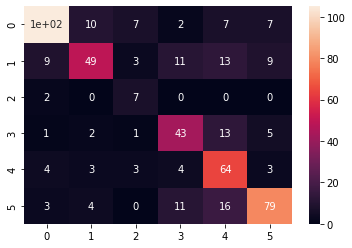

In [27]:
nb_cm = confusion_matrix(test_classes, predicted_multinomial_nb)
sns.heatmap(nb_cm, annot = True)
plt.show()

In [28]:
print(accuracy_score(test_classes, predicted_multinomial_nb))

0.694


## Bernoulli NB

In [29]:
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(X_over, y_over)

BernoulliNB()

In [30]:
predicted_bernoulli_nb = bernoulli_nb_model.predict(Xvector_test)
print(classification_report(predicted_bernoulli_nb, test_classes, zero_division = 0))

              precision    recall  f1-score   support

           0       0.25      0.43      0.31        79
           1       0.38      0.80      0.52        45
           2       1.00      0.07      0.13       134
           3       0.58      0.69      0.63        55
           4       0.72      0.59      0.65        98
           5       0.67      0.85      0.75        89

    accuracy                           0.50       500
   macro avg       0.60      0.57      0.50       500
weighted avg       0.67      0.50      0.46       500



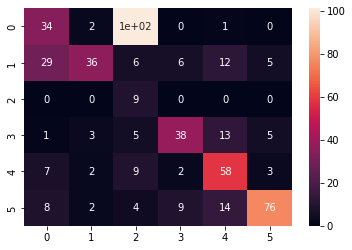

In [31]:
bernoulli_nb_cm = confusion_matrix(test_classes, predicted_bernoulli_nb)
sns.heatmap(bernoulli_nb_cm, annot = True)
plt.show()

In [32]:
print(accuracy_score(predicted_bernoulli_nb, test_classes))

0.502
